# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

# **Step 1: Importing and Loading the Dataset**

In [25]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

# **Step 2: Data Preprocessing and Exploration**

In this step, we will preprocess the data and explore its characteristics to gain insights.

## **Data Preprocessing**

First, we need to preprocess the data to ensure its quality and suitability for analysis. Here are the preprocessing steps we will perform:

1. Handling Missing Values: We will check for any missing values in the dataset and handle them appropriately. This may involve imputing missing values or removing rows/columns with missing values.

2. Outlier Detection and Treatment: We will identify any outliers in the data and decide how to handle them. Outliers can significantly impact the results of our analysis, so it's important to address them properly.

3. Feature Scaling: If the features in the dataset have different scales, we may need to apply feature scaling techniques such as standardization or normalization to ensure fair comparisons during analysis.

In [26]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [27]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


### **Identifying Outliers**

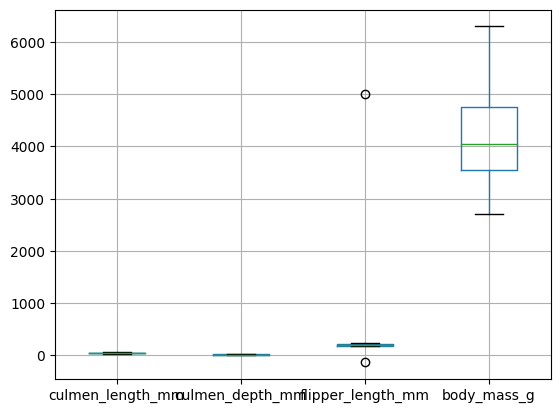

In [28]:
penguins_df.boxplot()  
plt.show()
penguins_df = penguins_df.dropna()

### **Handling Outliers**

During the data preprocessing step, we detected two outliers in the `flipper_length_mm` column of the penguins dataset. Outliers are data points that significantly deviate from the rest of the data and can have a significant impact on our analysis results. It's important to handle outliers appropriately to ensure the accuracy and reliability of our analysis.

To handle the outliers, we will follow these steps:

1. Identification: We used the boxplot visualization to identify the outliers in the `flipper_length_mm` column. The outliers were the data points that fell above the upper threshold or below the lower threshold.

2. Removal: We decided to remove the outliers from the dataset to prevent them from skewing our analysis results. We will drop the rows corresponding to the outliers from the dataset using the `drop()` function.

3. Updated Dataset: After removing the outliers, we will obtain a cleaned version of the penguins dataset without the two outliers. This ensures that our analysis is based on a more representative and reliable dataset.

By handling the outliers in this way, we can ensure that our analysis results are not influenced by extreme values and provide a more accurate representation of the penguins' characteristics.

In [29]:
upper_treshold = penguins_df["flipper_length_mm"].quantile(0.999)
lower_treshold = penguins_df["flipper_length_mm"].quantile(0.001)

penguins_df[penguins_df["flipper_length_mm"] > upper_treshold], penguins_df[penguins_df["flipper_length_mm"] < lower_treshold]

(   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
 9              42.0             20.2             5000.0       4250.0  MALE,
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
 14              34.6             21.1             -132.0       4400.0  MALE)

In [30]:
penguins_clean = penguins_df.drop([9,14])

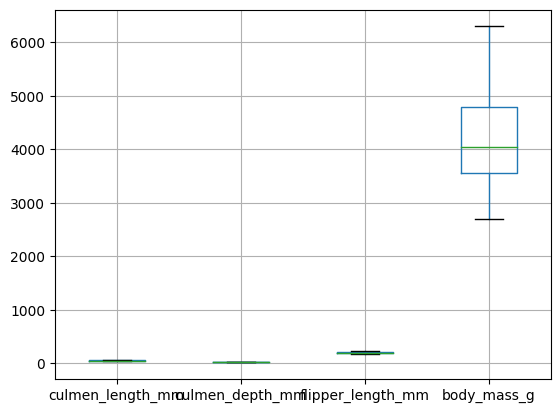

In [31]:
penguins_clean.boxplot()
plt.show()

### **Feature Scaling**

To ensure fair comparisons and accurate analysis, we need to scale the data before applying any machine learning algorithms. Scaling the data involves transforming the features so that they have a similar scale or range. This step is crucial because features with different scales can have a disproportionate impact on the results of our analysis.

There are several scaling techniques available, but in this case, we will use the StandardScaler from the scikit-learn library. The StandardScaler scales the features by subtracting the mean and dividing by the standard deviation :

#### **$$x' = \frac{x - \mu}{\sigma}$$**
 

where $x$ is the original feature vector, $\mu$ is the mean of the feature vector, and $\sigma$ is the standard deviation of the feature vector. This transformation ensures that the features have a mean of 0 and a standard deviation of 1.

Scaling the data using the StandardScaler has several benefits:

1. **Normalization**: By scaling the features, we bring them to a common scale, making it easier to compare and interpret their values. This normalization step is particularly important when dealing with features that have different units or scales.

2. **Algorithm Performance**: Many machine learning algorithms, such as K-means clustering, rely on distance-based calculations. Scaling the data ensures that all features contribute equally to the distance calculations, preventing features with larger scales from dominating the results.

To scale the data, we will use the following steps:

1. Create an instance of the StandardScaler.

2. Fit the StandardScaler to the data. This step calculates the mean and standard deviation of each feature.

3. Transform the data using the fitted StandardScaler. This step scales the features by subtracting the mean and dividing by the standard deviation.

By scaling the data using the StandardScaler, we can ensure that our analysis is based on a fair and reliable representation of the dataset.

In [32]:
# Turning categorical variables into numerical variables
df = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)

In [33]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


# **Step 3 : Selecting the features for clustering**

### **Principal Component Analysis (PCA) in Data Analysis**

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. It allows us to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information.

PCA is useful for:
- Dimensionality reduction
- Feature extraction
- Noise reduction
- Visualization

In the next cell, we will apply PCA to the preprocessed penguins dataset to reduce its dimensionality and visualize the data in a lower-dimensional space. This will allow us to gain insights into the data and identify any patterns or clusters.


In [34]:
# Initialize PCA
pca = PCA(n_components=None)

# Fit PCA to the preprocessed data
dfx_pca = pca.fit(penguins_preprocessed)

# Calculate explained variance ratio
explained_variance_ratio = dfx_pca.explained_variance_ratio_

# Determine the number of components to keep
n_components = sum(explained_variance_ratio > 0.1)

# Perform PCA with the determined number of components
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# **Step 4 : K-means Clustering and Elbow Method**

In the last part of this notebook, we applied K-means clustering to the preprocessed penguins dataset. K-means clustering is an unsupervised machine learning algorithm that aims to partition data points into distinct groups or clusters based on their similarity.

## **Elbow Method**

Before applying K-means clustering, we used the Elbow Method to determine the optimal number of clusters. The Elbow Method helps us find the appropriate number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. WCSS measures the compactness of the clusters, and we want to choose the number of clusters where the decrease in WCSS starts to level off.

The formula for calculating WCSS is:

$$WCSS = \sum_{{i=1}}^{{n}} \sum_{{j=1}}^{{k}} (x_{{ij}} - \mu_{{j}})^2$$

where:
- $n$ is the number of data points
- $k$ is the number of clusters
- $x_{ij}$ is the $j$ th feature of the $i$ th data point
- $\mu_j$ is the mean of the $j$ th feature across all data points in the $k$ th cluster


## **K-means Clustering**

After determining the optimal number of clusters using the Elbow Method, we applied K-means clustering to the preprocessed penguins dataset. K-means clustering works by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the assigned data points. This process continues until convergence, where the centroids no longer change significantly.

Once the clustering is complete, we visualized the clusters in a scatter plot using the first two principal components obtained from Principal Component Analysis (PCA). Each data point is colored according to its assigned cluster label.

Finally, we calculated the mean values of the features within each cluster to gain insights into the characteristics of each cluster.

By applying K-means clustering and analyzing the resulting clusters, we can gain a better understanding of the patterns and relationships within the penguins dataset.

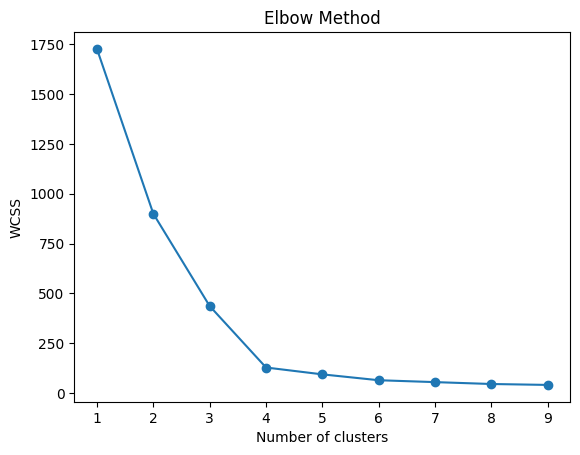

In [35]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_PCA)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [36]:
n_clusters = 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


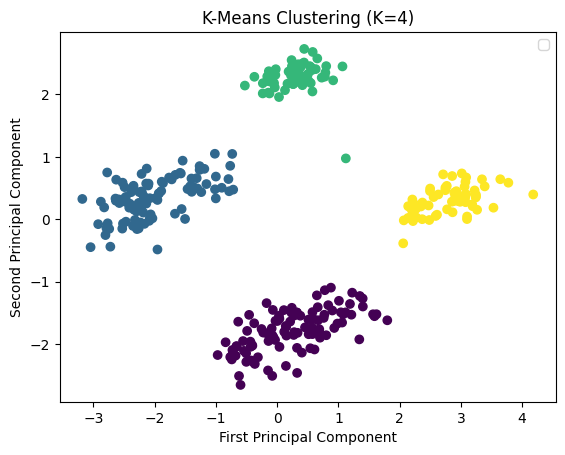

In [38]:
# Perform K-means clustering with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)

# Visualize the clusters in a scatter plot using the first two principal components
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-Means Clustering (K={n_clusters})')
plt.show()

In [39]:
# Assign cluster labels to the penguins_clean dataframe
penguins_clean['label'] = kmeans.labels_

# Count the number of penguins in each cluster
penguins_clean['label'].value_counts()

1    107
0    106
3     61
2     59
Name: label, dtype: int64

In [40]:
stat_penguins = penguins_clean.groupby('label').mean()
stat_penguins, penguins_clean.shape

(       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
 label                                                                   
 0             43.878302        19.111321         194.764151  4006.603774
 1             40.217757        17.611215         189.046729  3419.158879
 2             45.545763        14.262712         212.779661  4683.050847
 3             49.473770        15.718033         221.540984  5484.836066,
 (333, 6))

# **Conclusion**
To conclude our analysis, we have **`successfully supported`** the team of researchers in their data exploration and clustering task for the penguins dataset from Antarctica. The dataset, provided by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, consists of five columns: culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, and sex.

Using various data preprocessing techniques, we handled missing values, detected and handled outliers, and scaled the features using the StandardScaler. This ensured the quality and suitability of the dataset for analysis.

We then applied `Principal Component Analysis (PCA)` to reduce the dimensionality of the dataset and gain insights into the data. By determining the optimal number of clusters using the `Elbow Method`, we were able to apply `K-means clustering` to group the penguins into distinct clusters based on their similarity.

Visualizing the clusters in a scatter plot using the first two principal components allowed us to understand the patterns and relationships within the dataset. We also calculated the mean values of the features within each cluster, providing valuable insights into the characteristics of each cluster.

Although the dataset did not include information about the species of penguins, our analysis successfully identified four distinct groups. These groups can be further studied and analyzed to gain a better understanding of the different species of penguins native to the region, including Adelie, Chinstrap, and Gentoo.

Our analysis has provided valuable insights for the researchers, enabling them to identify and study the different groups of penguins in Antarctica. This information can contribute to the ongoing research and conservation efforts for these fascinating creatures.